<a href="https://colab.research.google.com/github/bidishaaiml/COE_week5/blob/main/Week5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Preprocessing on the Titanic dataset**

In [576]:
#load all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

### **Loading the dataset**

In [577]:
#load the dataset
df=pd.read_csv('/content/train (1).csv')

In [578]:
#print the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [579]:
#Some information about the dataset like null values, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [580]:
df.describe()  # Generates descriptive statistics for numerical columns in the dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Checking for missing values and handling the missing values**

In [581]:
# checking for null values in the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [582]:
# finding the unique values in the Embarked column
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [583]:
# filling the null values in the Embakred column with the mode value
df.Embarked = df.Embarked.fillna(df['Embarked'].mode()[0])


# filling the null values in the Age colum with the median age
median_age = df.Age.median()
df.Age.fillna(median_age, inplace = True)

In [584]:
# Dropping the 'Cabin' column due to numerous null values
df.drop('Cabin', axis = 1,inplace = True)

In [585]:
# Replacing zero values in the 'Fare' column with the median fare
df['Fare']=df['Fare'].replace(0,df['Fare'].median())

In [586]:
df.isnull().sum()

#Infernce: All the null values were effectively handled

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### **Detecting Duplicate values and removing them**

In [587]:
# Checking for duplicate values
duplicates = df.duplicated()

# Printing the duplicate rows, if any
if duplicates.any():
    print("Duplicate rows found:")
    print(df[duplicates])

    # Removing duplicate values
    df_cleaned = df.drop_duplicates()

    print("Dataframe after removing duplicates:")
    print(df_cleaned)
else:
    print("No duplicate rows found.")

No duplicate rows found.


### **Some data visualizations**

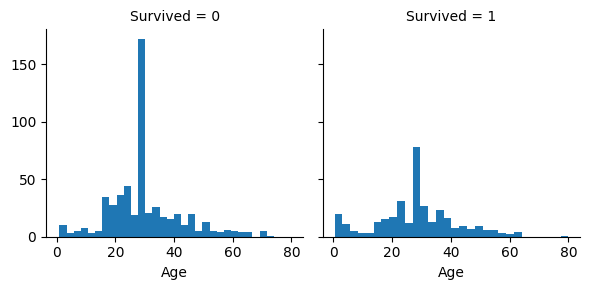

In [588]:
# Visualising the survival of passengers based on their age
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=30)

#Inference: peaple between age group of 20 to 40 died more
#also people between 20 to 40 age survived more than other age groups

In [589]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

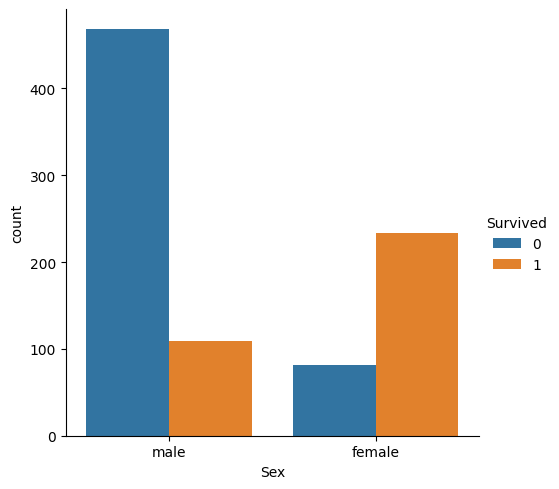

In [590]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)
#more males died and more females survived

<Axes: xlabel='Survived', ylabel='count'>

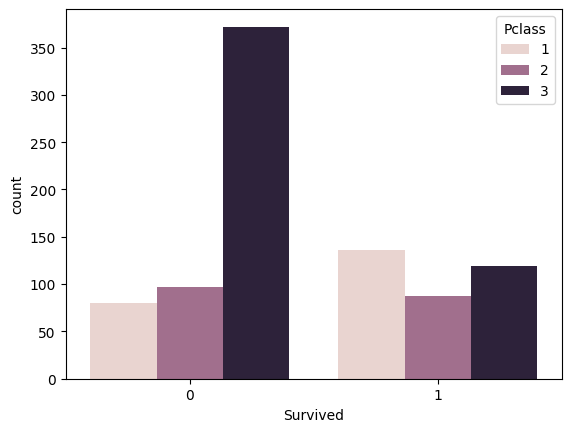

In [591]:
sns.countplot(x='Survived',hue='Pclass',data=df)
#Class 3 people died in huge numbers
#class 1 people survived more

### **Outlier Handling**

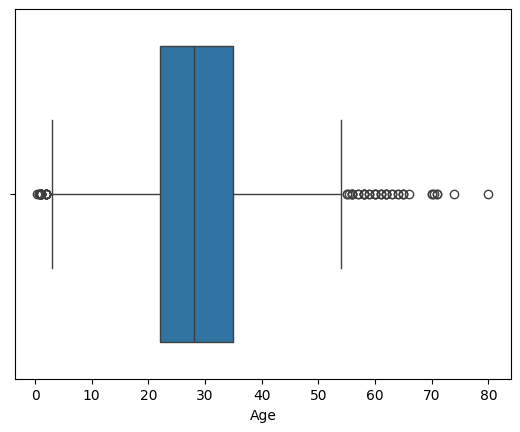

In [592]:
# check and visualize to identify potential outliers in the Age column
sns.boxplot(x=df['Age'])
plt.show()

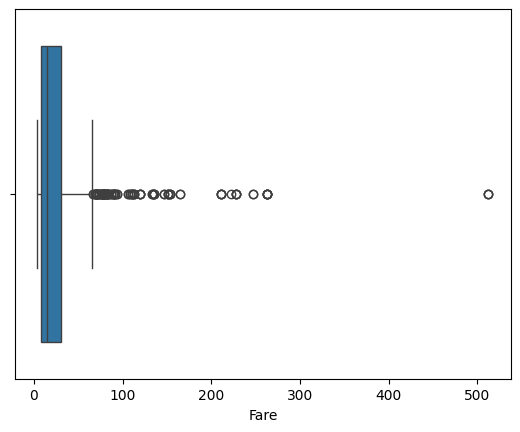

In [593]:
# check and visualize to identify potential outliers in the Fare column
sns.boxplot(x=df['Fare'])
plt.show()

In [594]:
# a generalized function to detect the outlier thresholds
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [595]:
print(outlier_thresholds(df, "Age"))
#Inference: the ages below 2.5 and the ages above 54.5 are the outliers

(2.5, 54.5)


In [596]:
# Calculating the lower and upper bounds for outliers in the 'Fare' column using a custom function `outlier_thresholds`
low, up = outlier_thresholds(df, "Fare")
print(outlier_thresholds(df, "Fare"))

(-26.687499999999996, 65.6125)


In [597]:
df[(df["Fare"] < low) | (df["Fare"] > up)].head()
# printing the outlier rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C


In [598]:
# A function to detect outliers in the dataset
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

print(check_outlier(df, "Age"))    # True  (yes, if there is at least 1 outlier.)
print(check_outlier(df, "Fare"))   # True  (yes, if there is at least 1 outlier.)

True
True


In [599]:
def grab_col_names(dataframe, cat_th=10, car_th=20):


    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]
print(num_cols)
#check outliers in numerical columns.
for col in num_cols:
    print(col, check_outlier(df, col))


Observations: 891
Variables: 11
cat_cols: 6
num_cols: 3
cat_but_car: 2
num_but_cat: 4
['Age', 'Fare']
Age True
Fare True


In [600]:
# Function to replace outlier values in columns instead of removing the entire columns
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [601]:
# Substituting these outliers with specified thresholds.
for col in num_cols:
    replace_with_thresholds(df, col)



#After replacing values, no outliers remain in the dataset.
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
Fare False


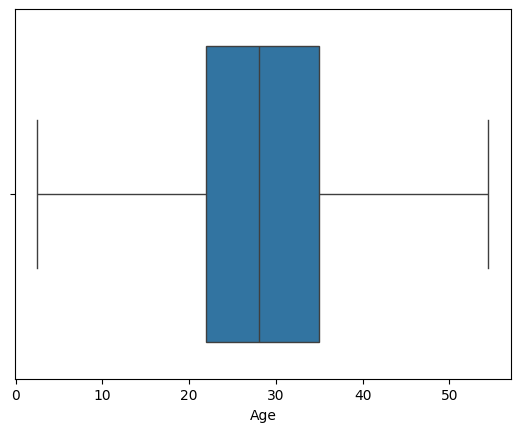

In [602]:
sns.boxplot(x=df['Age'])
plt.show()

#Inference: No more outliers

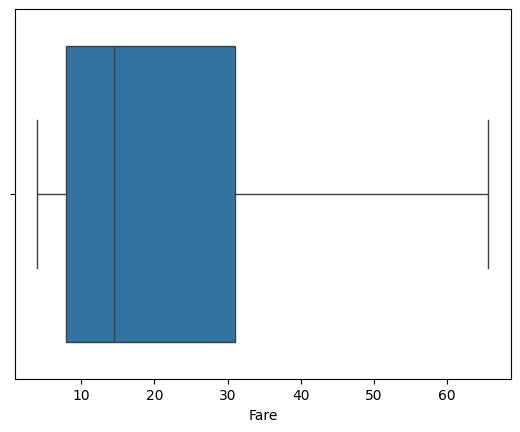

In [603]:
sns.boxplot(x=df['Fare'])
plt.show()

#Inference: No more outliers

### **Removing Irrelevant Columns**

In [604]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6125,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [605]:
#These columns have been removed as they do not contribute significantly.
cols = ['Name', 'Ticket']
df = df.drop(cols, axis=1)

### **Finding Correlations among the columns**

In [606]:
# seperating numerical and categorical columns
num_cols = ['PassengerId','Survived','Pclass','Age', 'Fare','SibSp','Parch']  #
cols_to_encode = ['Pclass', 'Sex', 'Embarked']

In [607]:
num_df = df[num_cols]

In [608]:
# Calculating correlations among the numerical columns
corr_matrix = num_df.corr()

print("Correlation Matrix:")
corr_matrix

Correlation Matrix:


,PassengerId,Survived,Pclass,Age,Fare,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.036636,0.006563,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.060622,0.312774,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.340404,-0.727852,0.083081,0.018443
Age,0.036636,-0.060622,-0.340404,1.000000,0.148268,-0.239601,-0.178959
Fare,0.006563,0.312774,-0.727852,0.148268,1.000000,0.329661,0.289886
SibSp,-0.057527,-0.035322,0.083081,-0.239601,0.329661,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.178959,0.289886,0.414838,1.000000


In [609]:
#Calculating correlations with the target column 'Survived'
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.312774
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.060622
Pclass        -0.338481
Name: Survived, dtype: float64

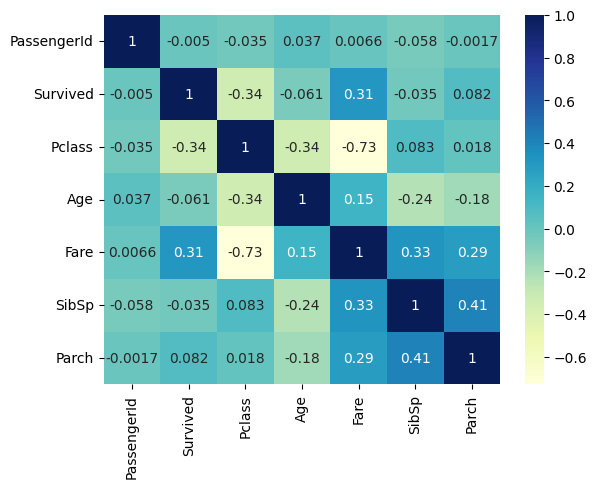

In [610]:
#visualizing the correlaton matrix
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()
#Dark-colored cells indicate a strong positive relationship.
#Very light-colored cells indicate a strong negative correlation.

### **Creating New columns**

In [611]:
#Combining 'SibSp' (siblings and spouse) and 'Parch' (parents and children) columns into a single column representing family size
df['FamilySize'] = df['SibSp'] + df['Parch']+1

<Axes: xlabel='FamilySize', ylabel='count'>

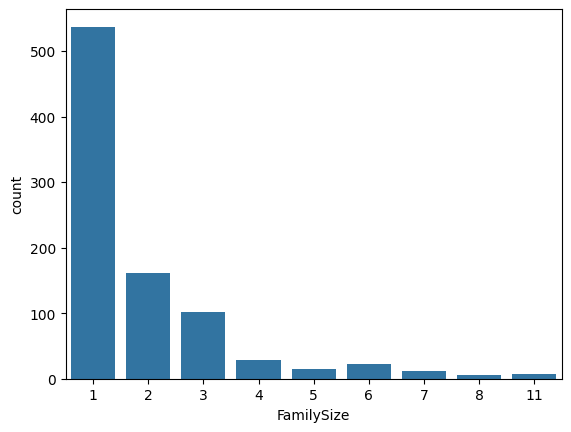

In [612]:
sns.countplot(x='FamilySize',data=df)
#Most of the people travelled alone

### **Encoding Categorical Columns**

In [613]:
from sklearn.preprocessing import OneHotEncoder

#Columns to be one-hot encoded
cols_to_encode = ['Pclass', 'Sex', 'Embarked']

#Instantiating the OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

#Fit and transform the specified columns
encoded_array = ohe.fit_transform(df[cols_to_encode])

#Creating a dataframe with the encoded columns
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(cols_to_encode))

#Droping the original columns from the dataframe
df_dropped = df.drop(cols_to_encode, axis=1)

#Combining the encoded columns with the rest of the dataframe
final_df = pd.concat([df_dropped.reset_index(drop=True), encoded_df], axis=1)

print("Final DataFrame after OneHotEncoding:")
final_df.head()

Final DataFrame after OneHotEncoding:


,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,2,0.0,1.0,1.0,0.0,1.0
1,2,1,38.0,1,0,65.6125,2,0.0,0.0,0.0,0.0,0.0
2,3,1,26.0,0,0,7.9250,1,0.0,1.0,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,2,0.0,0.0,0.0,0.0,1.0
4,5,0,35.0,0,0,8.0500,1,0.0,1.0,1.0,0.0,1.0


In [614]:
df=final_df

### **Extracting Independent and Dependent Variables**

In [615]:
y=df["Survived"]
x=df.drop("Survived",axis=1)

In [616]:
df.shape

(891, 12)

In [617]:
y.shape

(891,)

In [618]:
x.shape

(891, 11)

### **Dividing the data into Train and Test sets**

In [619]:
# Splitting the dataset into training and testing sets with a test size of 20% and a random state of 42
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### **Feature Scaling**

In [620]:
# Scaling the features to have a mean of zero and standard deviation of one
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

**Now the data is ready to be fitted in the machine learning model**